# Assignment # 2 : Decisions Trees and Classification(Targeted Marketing Campaign).
## Data Science 450

In this assignment use historical data from past customer responses to build a classification model.
We will apply the trained model to a new set of prospects to whom we may want extend an offer for a PEP. Rather than doing a mass marketing campaign to all new prospects, we would like to target those that are likely to respond positively to our offer (according to our classification model).

- Evaluate your model accuracy.
    - 
- Spend time experimenting with different setting for the treebasses algorithms - such as pruning, binary branching, etc. to see if you can improve the performance of your model.
    - 

## Load & examine the data set.

The function shown in the cell below loads the data from the .csv file. 
Execute the code in this cell to load the data into your notebook. Make sure you have the **.csv file** in your working directory!.

In [104]:
rm(list=ls())
# Clear Console:
cat("\014")
# Set repeatable random seed.
set.seed(123)
#Load the dataset.
read.bank = function(file = 'Bank Data.csv'){
  ## Read the csv file
  bank <- read.csv(file, header = TRUE, 
                         stringsAsFactors = FALSE)
  bank[complete.cases(bank), ]
}

## Partition the Data Set.

Following function splits the wine dataset into test and training data sets, with exactly 30% going to test and 70% going to training data set.

In [105]:
# Partition the data into test and training data sets.
PartitionExact = function(dataSet, fractionOfTest = 0.3)
{
#  browser()
  random <-runif(nrow(dataSet))
  quant <- quantile(random,fractionOfTest)
  testFlag <- random <= quant
  testingData <- dataSet[testFlag, ]
  trainingData <- dataSet[!testFlag, ]
  dataSetSplit <- list(trainingData=trainingData, testingData=testingData)
}

## Load and cleanse the file.
I am now calling the function "read.wine" to load the arff file and then going onto rename few columns so as to remove the blank space with a period so as to use these columns in the forumla for the decision tree modeling.


In [106]:
# Load and cleanse the csv file.
bank = read.bank()

## Check the structure of the data set.
Check the structure of the data set.

In [107]:
#Check out the structure of the cleansed object.
str(bank)

'data.frame':	600 obs. of  11 variables:
 $ age        : int  48 40 51 23 57 57 22 58 37 54 ...
 $ sex        : chr  "FEMALE" "MALE" "FEMALE" "FEMALE" ...
 $ region     : chr  "INNER_CITY" "TOWN" "INNER_CITY" "TOWN" ...
 $ income     : num  17546 30085 16575 20375 50576 ...
 $ married    : chr  "NO" "YES" "YES" "YES" ...
 $ children   : int  1 3 0 3 0 2 0 0 2 2 ...
 $ car        : chr  "NO" "YES" "YES" "NO" ...
 $ save_act   : chr  "NO" "NO" "YES" "NO" ...
 $ current_act: chr  "NO" "YES" "YES" "YES" ...
 $ mortgage   : chr  "NO" "YES" "NO" "NO" ...
 $ pep        : chr  "YES" "NO" "NO" "NO" ...


## Convert character columns to numeric.

In [108]:
bank$pep <- as.numeric(bank$pep == "YES")
bank$sex <- as.numeric(bank$sex == "MALE")
bank$region[bank$region == "INNER_CITY"] <- 1
bank$region[bank$region == "TOWN"] <- 2
bank$region[bank$region == "RURAL"] <- 3
bank$region[bank$region == "SUBURBAN"] <- 4
bank$region <- as.numeric(bank$region)
bank$married <- as.numeric(bank$married == "YES")
bank$car <- as.numeric(bank$car == "YES")
bank$save_act <- as.numeric(bank$save_act == "YES")
bank$current_act <- as.numeric(bank$current_act == "YES")
bank$mortgage <- as.numeric(bank$mortgage == "YES")
str(bank)

'data.frame':	600 obs. of  11 variables:
 $ age        : int  48 40 51 23 57 57 22 58 37 54 ...
 $ sex        : num  0 1 0 0 0 0 1 1 0 1 ...
 $ region     : num  1 2 1 2 3 2 3 2 4 2 ...
 $ income     : num  17546 30085 16575 20375 50576 ...
 $ married    : num  0 1 1 1 1 1 0 1 1 1 ...
 $ children   : int  1 3 0 3 0 2 0 0 2 2 ...
 $ car        : num  0 1 1 0 0 0 0 1 1 1 ...
 $ save_act   : num  0 0 1 0 1 1 0 1 0 1 ...
 $ current_act: num  0 1 1 1 0 1 1 1 0 1 ...
 $ mortgage   : num  0 1 0 0 0 0 0 0 0 0 ...
 $ pep        : num  1 0 0 0 0 1 1 0 0 0 ...


## Data Set Head and Tail.
- Check the head and tail of the dataset to get a sense of the data.

In [109]:
head(bank)
tail(bank)

age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
48,0,1,17546.0,0,1,0,0,0,0,1
40,1,2,30085.1,1,3,1,0,1,1,0
51,0,1,16575.4,1,0,1,1,1,0,0
23,0,2,20375.4,1,3,0,0,1,0,0
57,0,3,50576.3,1,0,0,1,0,0,0
57,0,2,37869.6,1,2,0,1,1,0,1


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
595,59,0,3,30971.80,1,3,1,1,1,1,0
596,61,0,1,47025.00,0,2,1,1,1,1,0
597,30,0,1,9672.25,1,0,1,1,1,0,0
598,31,0,2,15976.30,1,0,1,1,0,0,1
599,29,1,1,14711.80,1,0,0,1,0,1,0
600,38,1,2,26671.60,0,0,1,0,1,1,1


### Summary statistics
All the columns are num or integer hence we can calculate the summary of the complete dataset.

Execute the code in the cell below and note the result.

In [110]:
#All the columns are num or integer hence we can calculate the summary of the complete dataset.
lapply(bank, summary)

$age
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   30.00   42.00   42.40   55.25   67.00 

$sex
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.5     0.5     1.0     1.0 

$region
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   1.918   3.000   4.000 

$income
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5014   17260   24930   27520   36170   63130 

$married
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    1.00    0.66    1.00    1.00 

$children
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.012   2.000   3.000 

$car
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4933  1.0000  1.0000 

$save_act
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    1.00    0.69    1.00    1.00 

$current_act
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.7583  1.0000  1.0000 

$mortgage
   Min. 1st Qu.  Median   

# Data Exploration. 
Create the histrogram of all the numeric attributes. R/W has been been treated as id variables, we can instead see the histogram of "PEP" to get a sense of numbers of R & W.

No id variables; using all as measure variables


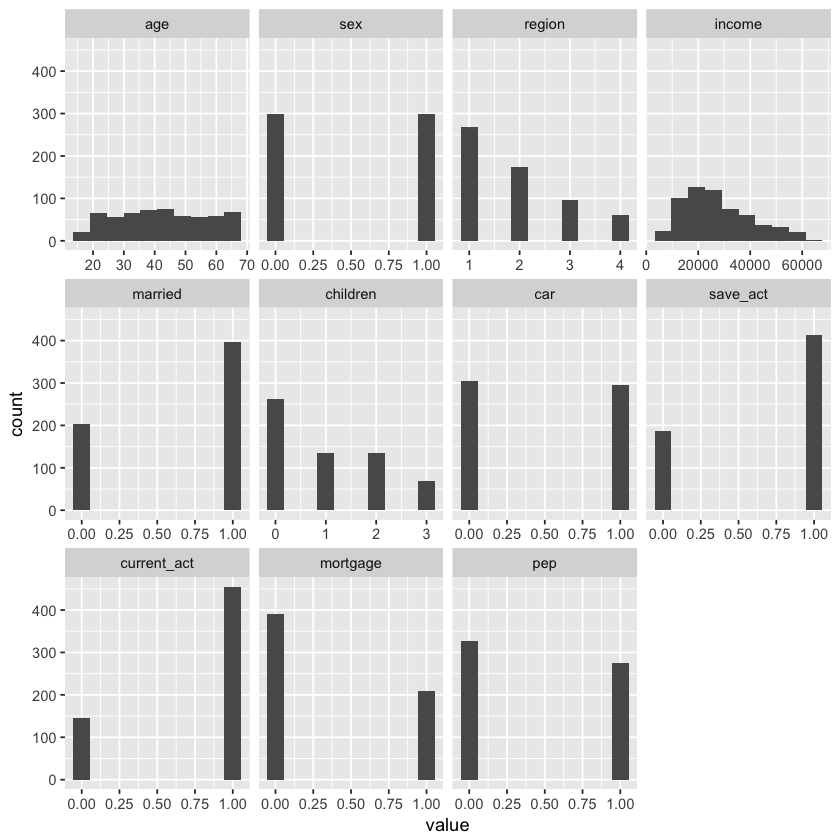

In [111]:
library(reshape2)
library(ggplot2)

ggplot(data = melt(bank), mapping = aes(x = value)) + 
  geom_histogram(bins = 10) + facet_wrap(~variable, scales = 'free_x')

### Partition the dataset for the Model.

I am now going to call the PartitionExact function to split the dataset into training and test dataset.

In [112]:
bankDataset = PartitionExact(bank)
Testbank <- bankDataset$testingData
Trainbank <-bankDataset$trainingData

## Analyse the count and header portion of partitioned datasets

In [124]:
nrow(Testbank)
head(Testbank)
nrow(Trainbank)
head(Trainbank)

[1] 180

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
1,48,0,1,17546.0,0,1,0,0,0,0,1
6,57,0,2,37869.6,1,2,0,1,1,0,1
15,36,1,3,19474.6,1,0,0,1,1,1,0
17,37,0,2,17729.8,1,2,0,0,0,1,0
18,46,0,4,41016.0,1,0,0,1,0,1,0
29,39,0,1,29359.1,0,3,1,0,1,1,0


[1] 420

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
2,40,1,2,30085.10,1,3,1,0,1,1,0
3,51,0,1,16575.40,1,0,1,1,1,0,0
4,23,0,2,20375.40,1,3,0,0,1,0,0
5,57,0,3,50576.30,1,0,0,1,0,0,0
7,22,1,3,8877.07,0,0,0,0,1,0,1
8,58,1,2,24946.60,1,0,1,1,1,0,0


## Create Decision Tree Model.
- Create a decision tree model based on all the attributes.
- Create a decision tree model based on the forumula on six attributes, this model will be trained on the training data set.

In [125]:
library(rpart)
formula <- pep ~ .
formula3 <- pep ~ . - sex - car - region - current_act
banktree <- rpart(formula = formula, data = Trainbank,method="class")
banktree3 <- rpart(formula = formula3, data = Trainbank,method="class")

## Plot tree
- Plot the tree model based on six attributes and all attributes.

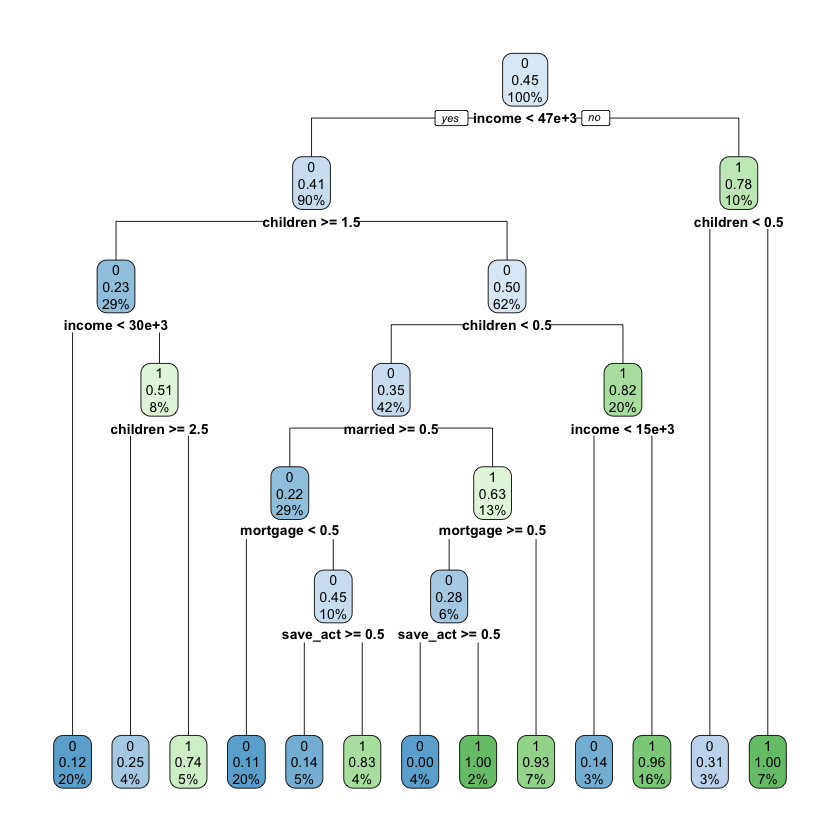

In [126]:
library("rpart.plot")
rpart.plot(banktree)
rpart.plot(banktree3)

## Prediction based on the model
Use the model to make predictions on the test data set.

In [127]:
#Use the model to make the predictions.
PEPPrediction <- as.numeric(predict(banktree, newdata = Testbank, type="class"))
PEPPrediction3 <- as.numeric(predict(banktree3, newdata = Testbank, type="class"))

 ## Prune The Tree.

In [128]:
prune_banktree <- prune(banktree, cp = 0.03)
prune_banktree3 <- prune(banktree3, cp = 0.03)

## Plot The Pruned Tree

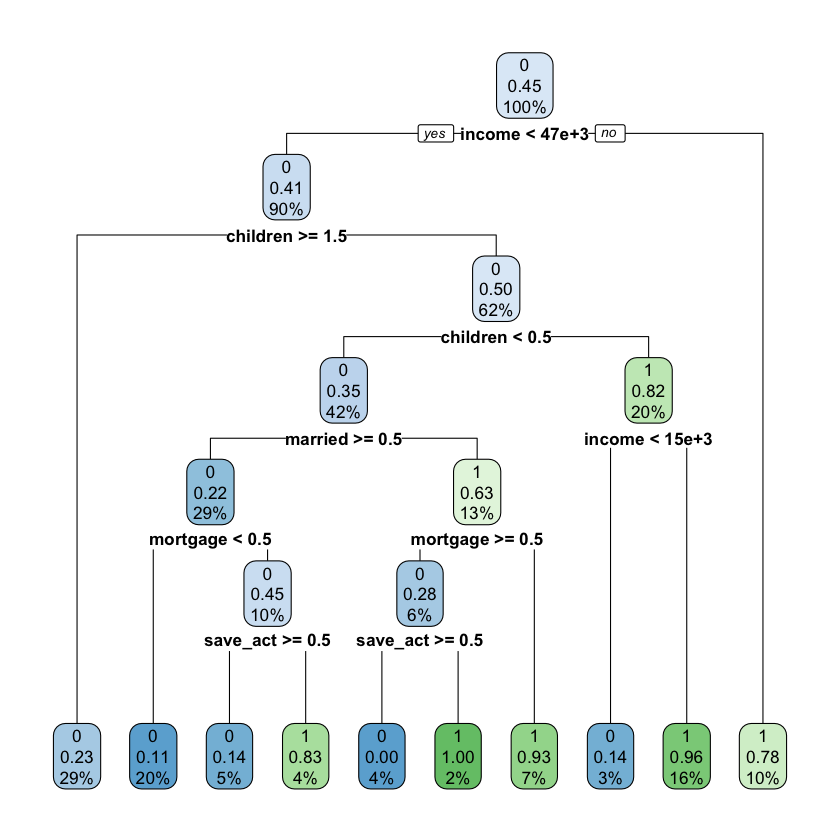

In [129]:
#Plot tree after pruning.
rpart.plot(prune_banktree)
rpart.plot(prune_banktree3)

## Prediction Based On Pruned Model.

In [130]:
PrunePEPPrediction <- as.numeric(predict(prune_banktree, newdata = Testbank, type="class"))
PrunePEPPrediction3 <- as.numeric(predict(prune_banktree3, newdata = Testbank, type="class"))

## Calculate the confusion matrix
- Cross tabulate the prediction against the 'PEP' attribute in the test dataset for model with all variables.
- Cross tabulate the prediction against the 'PEP' attribute in the test dataset for models with selected variables.

In [131]:
#Calculate Confusion Matrix for all attributes.
crosstabAll <- table(PEPPrediction, Testbank$pep)
crosstabAll

#Calculate Confusion Matrix for selected features
crosstab3 <- table(PEPPrediction3, Testbank$pep)
crosstab3

#Calculate Confusion Matrix for all pruned attributes.
PrunecrosstabAll <- table(PrunePEPPrediction, Testbank$pep)
PrunecrosstabAll

#Calculate Confusion Matrix for selected pruned features
Prunecrosstab3 <- table(PrunePEPPrediction3, Testbank$pep)
Prunecrosstab3

             
PEPPrediction  0  1
            1 91 10
            2  4 75

              
PEPPrediction3  0  1
             1 91 10
             2  4 75

                  
PrunePEPPrediction  0  1
                 1 85 20
                 2 10 65

                   
PrunePEPPrediction3  0  1
                  1 85 20
                  2 10 65

## Calculate Accuracy, TPR and FPR.

ROC curve is a plot of TPR against FPR and the area this curve is termed as AUC.
When you add TPR+FPR it should add up to 1.

- Calculate the Accuracy, TPR and FPR for all attributes.
- Calculate the Accuracy, TPR and FPR for selected attributes.

In [132]:
Accuracy <- function(Table.X)
{
  Accuracy.X <- (Table.X[1,1]+Table.X[2,2])/(Table.X[1,1]+Table.X[1,2]+Table.X[2,1]+Table.X[2,2])
  return(Accuracy.X)
}
#Calculate Specificity (TPR)
Specificity <- function(Table.X)
{
  Specificity.X <- (Table.X[2,2])/(Table.X[1,2]+Table.X[2,2])
  return(Specificity.X)
}
#calculate FPR from Confusion MAtrix
FPR <- function(Table.X)
{
  FPR.X <- (Table.X[1,2])/(Table.X[1,2]+Table.X[2,2])
  return(FPR.X)
}
# Calculate Accuracy for all attributes
AccuracyAll <- Accuracy(crosstabAll)
cat("Accuracy for all columns is : ", AccuracyAll,"\n")
# Calculate Accuracy for selected attributes
AccuracyA3 <- Accuracy(crosstab3)
cat("Accuracy for selected columns is : ", AccuracyA3,"\n")
# Calculate TPR for all attributes
TPRAll <- Specificity(crosstabAll)
cat("TPR for all columns is : ", TPRAll,"\n")
# Calculate TPR for selected attributes
TPRA3 <- Specificity(crosstab3)
cat("TPR for selected columns is : ", TPRA3,"\n")
# Calculate FPR for all attributes
FPRAll <- FPR(crosstabAll)
cat("FPR of all columns is : ", FPRAll,"\n")
# Calculate FPR for selected attributes
FPR3 <- FPR(crosstab3)
cat("FPR of selected columns is : ", FPR3,"\n")
# Calculate Accuracy for all pruned attributes
PruneAccAll <- Accuracy(PrunecrosstabAll)
cat("Accuracy of pruned model for all columns is : ", PruneAccAll,"\n")
# Calculate Accuracy for certain pruned attributes
PruneAcc3 <- Accuracy(Prunecrosstab3)
cat("Accuracy of pruned model for certain columns is : ", PruneAcc3,"\n")
# Calculate TPR for all pruned attributes
PruneTPRAll <- Specificity(PrunecrosstabAll)
cat("TPR of pruned model for all columns is : ", PruneTPRAll,"\n")
# Calculate TPR for selected pruned attributes
PruneTPRA3 <- Specificity(Prunecrosstab3)
cat("TPR of pruned model for selected columns is : ", PruneTPRA3,"\n")
# Calculate FPR for all pruned attributes
PruneFPRAll <- FPR(PrunecrosstabAll)
cat("FPR of pruned model for all columns is : ", PruneFPRAll,"\n")
# Calculate FPR for selected pruned attributes
PruneFPR3 <- FPR(Prunecrosstab3)
cat("FPR of pruned model for certain columns is : ", PruneFPR3,"\n")


Accuracy for all columns is :  0.9222222 
Accuracy for selected columns is :  0.9222222 
TPR for all columns is :  0.8823529 
TPR for selected columns is :  0.8823529 
FPR of all columns is :  0.1176471 
FPR of selected columns is :  0.1176471 
Accuracy of pruned model for all columns is :  0.8333333 
Accuracy of pruned model for certain columns is :  0.8333333 
TPR of pruned model for all columns is :  0.7647059 
TPR of pruned model for selected columns is :  0.7647059 
FPR of pruned model for all columns is :  0.2352941 
FPR of pruned model for certain columns is :  0.2352941 


## Calculate AUC
We would be using pROC package to calculate AUC 

In [133]:
library(pROC)
roc_obj_All <- roc(Testbank$pep, PEPPrediction)
auc(roc_obj_All)
roc_obj_3 <- roc(Testbank$pep, PEPPrediction3)
auc(roc_obj_3)

Area under the curve: 0.9201

Area under the curve: 0.9201

## Calculate AUC For Pruned Model

In [134]:
roc_obj_Prune_All <- roc(Testbank$pep, PrunePEPPrediction)
auc(roc_obj_Prune_All)

roc_obj_Prune_3 <- roc(Testbank$pep, PrunePEPPrediction3)
auc(roc_obj_Prune_3)

Area under the curve: 0.8297

Area under the curve: 0.8297